In [5]:
import glob, pathlib, tqdm, trimesh
import numpy as np

In [9]:
# collision_objs = glob.glob(r"D:\ig_pipeline\artifacts\aggregate\objects\*\*\shape\collision\*.obj")
collision_objs = glob.glob(r"C:\Users\Cem\research\iGibson-dev\igibson\data\ig_dataset\objects\*\*\shape\collision\*.obj")
print(len(collision_objs))

2665


In [10]:
# Count the number of o-directives in each
o_directives = {}
for p in tqdm.tqdm(collision_objs):
    p = pathlib.Path(p)
    target = p.parts[-5] + "-" + p.parts[-4]
    o_directives[target] = len(trimesh.load(p, force="mesh", skip_material=True).split())

100%|██████████████████████████████████████████████████████████████████████████████| 2665/2665 [00:34<00:00, 76.94it/s]


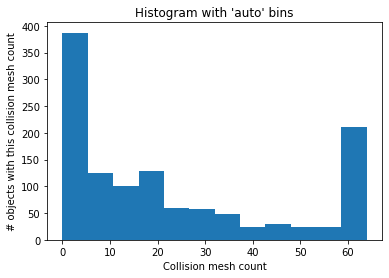

15.0
35.32154605263158
87.06830196357483


In [11]:
import matplotlib.pyplot as plt
a = np.array(list(o_directives.values()))
_ = plt.hist(np.minimum(a, 64), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel("Collision mesh count")
plt.ylabel("# objects with this collision mesh count")
plt.show()
print(np.median(a))
print(np.mean(a))
print(np.std(a))

In [ ]:
import sys
sys.path.append(r"D:\ig_pipeline")
from b1k_pipeline.utils import get_targets, PIPELINE_ROOT, parse_name

In [ ]:
import json
from collections import defaultdict
# Count the number of objects with non-tagged fixed links
link_cnts = {}
for target in tqdm.tqdm(get_targets("combined")):
    obj_list_file = PIPELINE_ROOT / "cad" / target / "artifacts" / "object_list.json"
    assert obj_list_file.exists(), "Missing obj list file " + str(obj_list_file)
    with open(obj_list_file, "r") as f:
        data = json.load(f)
        meshes = data["meshes"]
        parsed = [parse_name(x) for x in meshes]
        obj_link_cnts = defaultdict(set)
        for p in parsed:
            if not p.group("link_name") or p.group("link_name") == "base_link":
                continue
            if p.group("bad"):
                continue
            obj_name = p.group("obj_basename")
            link_name = p.group("link_basename")
            # Don't count openable links
            if p.group("tag") and "openable" in p.group("tag"):
                continue
            obj_link_cnts[obj_name].add(link_name)
        # fixed = sum(1 for x in parsed if x is not None and x.group("joint_type") == "F" and not x.group("tag"))
        link_cnts.update({x: len(y) for x, y in obj_link_cnts.items()})

In [ ]:
interesting = np.asarray(list(link_cnts.values()), dtype=int)
interesting = interesting[interesting>3]
print("Interesting count: ", len(interesting))
_ = plt.hist(interesting, bins="auto")  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel("Link count")
plt.ylabel("# targets with this link count")
plt.show()

In [ ]:
print("\n".join(str(x) for x in sorted(link_cnts.items(), key=lambda x: -x[1])))